Name: Seyyid Hikmet Celik

ID:181201047

Course: BIL470

In [221]:
# for analyzing data
import pandas as pd
import numpy as np
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn import metrics

# for plots
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# for training, our own implementation
from dt import DecisionTreeClassifier

# Exploratory Data Analysis (EDA)

## Reading and Tuning Dataset

In [222]:
iris = pd.read_csv('Iris.csv')

# istenildigi gibi tur stringlerini sayilara ceviriyorum
iris = iris.drop(columns='Id')
species = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris['Species'] = [species[item] for item in iris['Species']]

## Dataset Summary

In [223]:
display(iris)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Summary Each Features of Data

Özet olarak 150 satirlik, standart sapması yani farklılığı en çok SepalWidthCm özniteliğinde olan bir veri setimiz var. 

In [224]:
sl = iris['SepalLengthCm'].describe()
sw = iris['SepalWidthCm'].describe()
pl = iris['PetalLengthCm'].describe()
pw = iris['PetalWidthCm'].describe()

print(sl)
print(sw)
print(pl)
print(pw)

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64
count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64
count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64
count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64


## Duplicated Data of Dataset

In [225]:
display(iris[iris.duplicated()])
display(iris.duplicated().sum())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


3

## Checking Balance of Dataset

Aşağıdaki grafiğe baktığımızda tekrarlayan verileri çıkarmanın iyi bir fikir olmadığını görüyoruz çünkü tür sayıları eşit, yani veriler dengeli şekilde dağılmış durumda.

/Users/shc/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


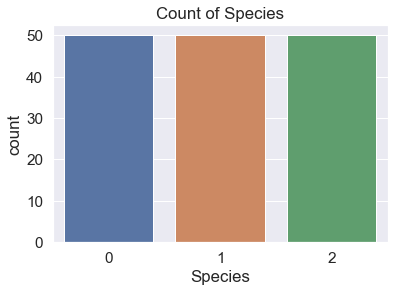

In [226]:
plt.title('Count of Species')
sbn.countplot(iris['Species'])
plt.show()

## Checking Null Values

Aşağıda görüleceği üzere veri setinden temizlememiz gereken null değerler yok.

In [227]:
print(iris.isnull().sum(axis = 0))

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Pair-plots of Features

Aşağıdaki grafiklere baktığımızda, farklı öznitelikler için verilerin birbirine göre uzayda nasıl dağıldığını görebiliyoruz ve bu da hangi özniteliği kullanmamız gerektiği konusunda bize kabaca fikir verebilir. Görüleceği üzere, örnek olarak PetalWidthCm ile SepalWidthCm özniteliklerini kullanmak daha iyi bir ayrım yapmamızı sağlayabilir.

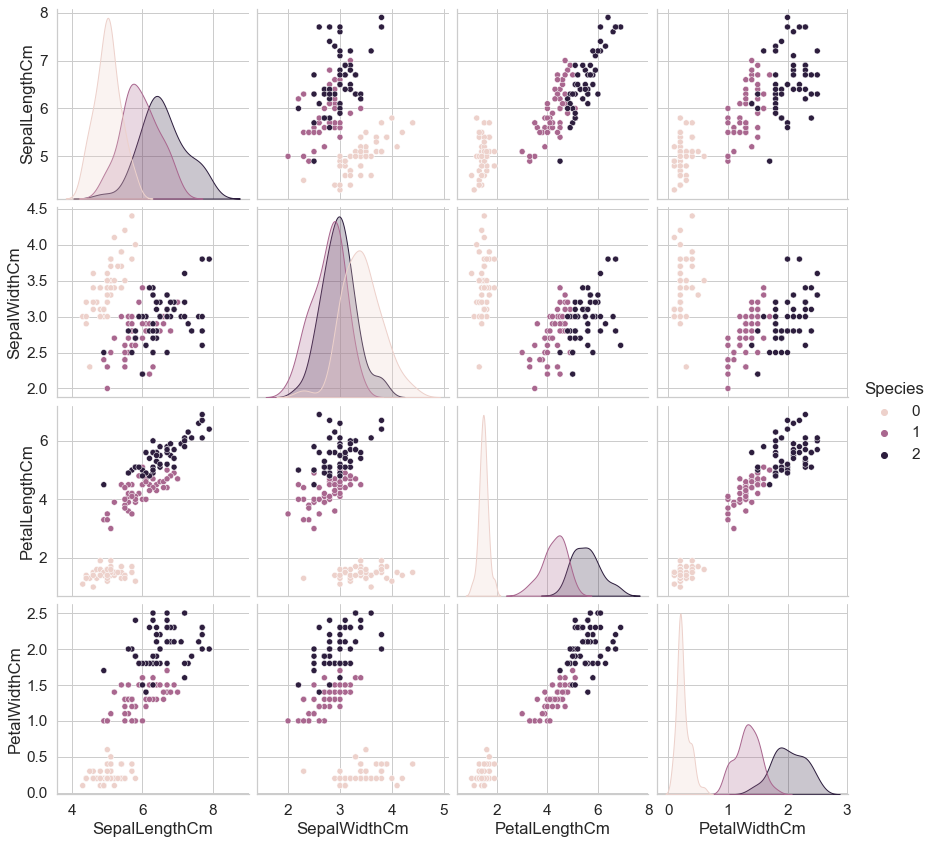

In [228]:
sbn.set_style('whitegrid')
sbn.pairplot(iris, hue='Species', height=3)
plt.show()

## Correlation of Features

Yine burada özniteliklerin korelasyonlarına bakarak hangilerini kullanmanın daha iyi olabileceği çıkarımına varabiliriz. Bizim için önemli olan veri setini olabildiğince ayrıştırmak olduğu için korelasyonu yani ilişkisi en az olanlara bakmamız gerekir. Yukarıda pair-plot üzerinden verdiğimiz PetalWidthCm ve SepalWidthCm öznitelikleri yine burada da -0.42 korelasyonla iyi seçenek olarak duruyor.

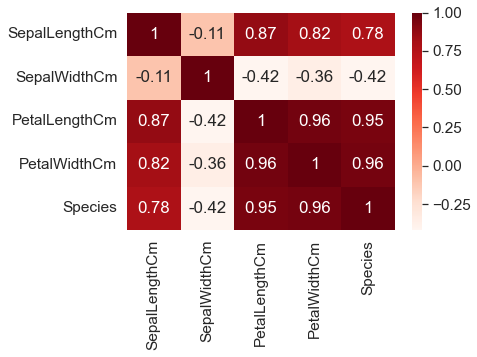

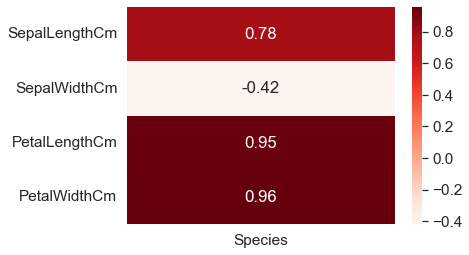

In [229]:
cm = iris.corr()
ft = cm.drop(columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
ft = ft.drop(labels=['Species'])

sbn.set(font_scale=1.4)
sbn.heatmap(cm, annot=True, cmap=plt.cm.Reds)
plt.show()

sbn.set(font_scale=1.4)
sbn.heatmap(ft, annot=True, cmap=plt.cm.Reds)
plt.show()

# Training with the Decision Tree Classifier

Veri setini eğitmek üzere, bu dokümanın sonunda ya da "dt.py" dosyasında bulabileceğiniz daha önceden oluşturduğumuz karar ağacı modelini, maksimum derinlik 5 olacak şekilde çağırıyoruz.

In [230]:
clf = DecisionTreeClassifier(max_depth=5)

## Split Dataset to Train and Test

Veri setini karıştırıyoruz (shuffle) ve %80 eğitim, %20 test verisi olacak şekilde ayrıştırıyoruz.

In [231]:
X = iris.values.tolist()
y = []

for row in X:
    y.append(int(row[4]))
    del row[4]

X = pd.Series(X)
y = pd.Series(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

X_train_list = X_train.values.tolist()
y_train_list = y_train.values.tolist()
X_test_list = X_test.values.tolist()
y_test_list = y_test.values.tolist()

## Train the Classifier

Veri setini oluşturmuş olduğumuz Gini Impurity algoritmasını kullanan model sayesinde eğitiyoruz.

In [232]:
clf.fit(X_train_list, y_train_list)

## Predicting Class of Test Values

Test verilerini tahmin ediyoruz ve beklenen değerlere benzer tahminler yaptığımızı görebiliyoruz ki bunları sonuçlar kısmında daha detaylı görebiliriz.

In [233]:
yhat = clf.predict(X_test_list)
print('Test Features Expected Classification')
print(y_test_list)
print('Prediction')
print(yhat)

print()

xhat = clf.predict(X_train_list)
print('Train Features Expected Classification')
print(y_train_list)
print('Prediction')
print(xhat)

Test Features Expected Classification
[2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 2]
Prediction
[2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 2]

Train Features Expected Classification
[2, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1]
Prediction
[2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1,

# RESULTS

## Confusion Matrix of Test

Aşağıda test değerleri için elde etmiş olduğumuz Confusion Matrix görülebilir. Bu matriste değerler ne kadar orta çaprazda toplanırsa o kadar doğru tahmin yaptığımızı gösteriyor ve bakıldığında, köşelerin 0 ya da 0'a çok yakın değerler olduğu ve bu da uygulamış olduğumuz karar ağacı algoritmasının test verileri için gayet iyi çalıştığını gösteriyor.

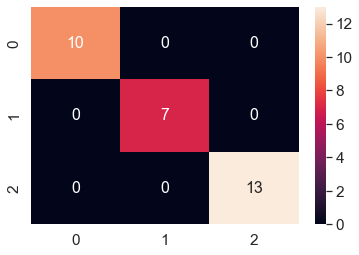

In [234]:
y_pred2 = pd.Series(yhat)
y_test2 = pd.Series(y_test_list)
mt = metrics.confusion_matrix(y_test2, y_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sbn.set(font_scale=1.4)
sbn.heatmap(df_cm, annot=True, annot_kws={'size': 16})
plt.show()

## Confusion Matrix of Train

Aşağıda train değerleri için elde etmiş olduğumuz Confusion Matrix görülebilir. Bakıldığında, köşelerin 0 ya da 0'a çok yakın değerler olduğu ve bu da uygulamış olduğumuz karar ağacı algoritmasının train verileri için gayet iyi çalıştığını gösteriyor.

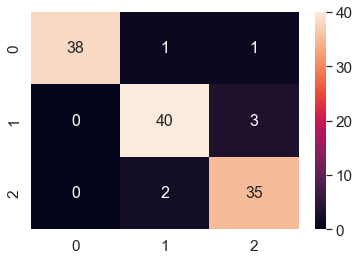

In [235]:
x_pred2 = pd.Series(xhat)
x_test2 = pd.Series(y_train_list)
mt = metrics.confusion_matrix(x_test2, x_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sbn.set(font_scale=1.4)
sbn.heatmap(df_cm, annot=True, annot_kws={'size': 16})
plt.show()

## F1-Score

Aşağıda test ve train tahminleri için f1 skorlarının 1'e çok yakın olduğu görülüyor ve bu da yine tahminlerimizin büyük oranda doğru çıktığını doğruluyor.

In [236]:
f1 = metrics.f1_score(y_test2, y_pred2, average='weighted')
print('F1-Score Test:')
print(f1)

f2 = metrics.f1_score(x_test2, x_pred2, average='weighted')
print('F1-Score Train:')
print(f2)

F1-Score Test:
1.0
F1-Score Train:
0.9421108861898336


## Accuracy

Yine benzer şekilde, 1'e yakın accuracy değerleri tahminlerimizin doğruluğunun iyi olduğunu gösteriyor.

In [237]:
accuracy = metrics.accuracy_score(y_test2, y_pred2)
print('Accuracy Test:')
print(accuracy)

accuracy2 = metrics.accuracy_score(x_test2, x_pred2)
print('Accuracy Train:')
print(accuracy2)

Accuracy Test:
1.0
Accuracy Train:
0.9416666666666667


## Precision

Tahminlerin kesinliğinin iyi olduğunu da yine 1'e yakın değerlerden görebiliyoruz.

In [238]:
precision = metrics.precision_score(y_test2, y_pred2, average='weighted')
print('Precision Test:')
print(precision)

precision2 = metrics.precision_score(x_test2, x_pred2, average='weighted')
print('Precision Train:')
print(precision2)

Precision Test:
1.0
Precision Train:
0.9433760683760684


## Recall

Tahminlerin beklenen değerlerle ne kadar ilişkili olduğunu yine aşağıdaki 1'e yakın olan değerlerden görebiliyoruz.

In [239]:
recall = metrics.recall_score(y_test2, y_pred2, average='weighted')
print('Recall Test:')
print(recall)

recall2 = metrics.recall_score(x_test2, x_pred2, average='weighted')
print('Recall Train:')
print(recall2)

Recall Test:
1.0
Recall Train:
0.9416666666666667


## Plot of ROC Curve and Value of AUC

ROC eğrilerinin birbirlerine yakın olduğunu ve AUC değerlerinin de 1'e yakınsadığını görüyoruz ki bu da yine hem train hem test tahminlerimizin gayet iyi olduğunu gösteriyor.

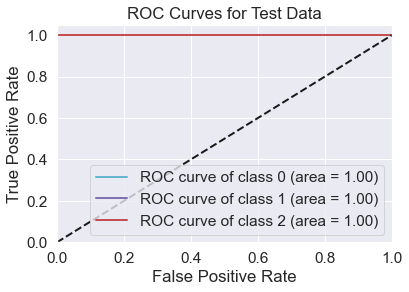

Macro Auc value:
1.0


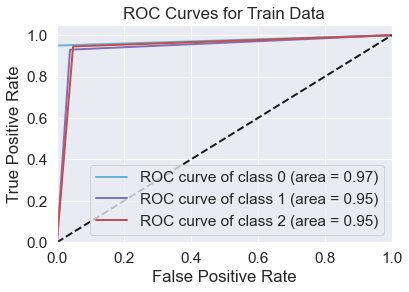

Macro Auc value:
0.9565041156733507


In [240]:
y_testb = label_binarize(y_test2, classes=[0, 1, 2])
y_predb = label_binarize(y_pred2, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_testb[:, i], y_predb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr = mean_tpr + np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = mean_tpr / 3
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

colors = cycle(['c', 'm', 'r'])

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Test Data')
plt.legend(loc='lower right')
plt.show()
print('Macro Auc value:')
print(roc_auc['macro'])

x_testb = label_binarize(x_test2, classes=[0, 1, 2])
x_predb = label_binarize(x_pred2, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(x_testb[:, i], x_predb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 3
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Train Data')
plt.legend(loc='lower right')
plt.show()
print('Macro Auc value:')
print(roc_auc['macro'])

Tüm değerlendirmeler ve değişik ölçme yöntemlerine bağlı sonuçlar göz önüne alındığında uygulamış olduğumuz algoritmanın hem test hem train verileri için iyi tahmin yaptığını ve ayrıca test tahminlerinin, train tahminlerinden uzak olmadığını hatta çok yakın olduğunu görebiliyoruz ki bu da yine Gini Impurity Karar Ağacı algoritmasının ne kadar iyi çalıştığını ve doğru uygulamış olduğumuzu bize gösteriyor.

# DecisionTreeClassifier

Gini algoritmasına göre oluşturulan karar ağacı ayrımında elde edilen gini skoru bize bölünmenin ne kadar iyi olduğuna dair bir fikir veriyor. En iyi ayrımda 0 skorunu elde etmemiz gerekiyor.
Buna göre özyinelemeli olarak yazılan ve yukarıda veri setini eğitmek için kullanmış olduğumuz karar ağacı sınıfı aşağıdaki kod parçasında görülebilir.

In [241]:
# dt.py
class DecisionTreeClassifier:
    # baslangicta karar agaci derinligini belirleyen constructor
    # varsayilan karar agaci derinligi 5
    def __init__(self, max_depth=5):
        self.root = None
        self.max_depth = max_depth

    # veri setini gini algoritmasina gore egitir
    def fit(self, X, y):
        self.root = self.recursive_tree(X, y)
        return

    # verilere bagli tahmin yapar
    def predict(self, X_test):
        if isinstance(X_test[0], float):
            node = self.root
            while node.left:
                if X_test[node.feature_index] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            return node.flower
        
        y_test = list()
        for element in X_test:
            node = self.root
            while node.left:
                if element[node.feature_index] < node.threshold:
                    node = node.left
                else:
                    node = node.right

            y_test.append(node.flower)
        return y_test
    
    # agac derinligine gore gini algoritmasini uygular ve agaci insa eder
    def recursive_tree(self, X, y, depth = 0):
        best_gini = float("inf")
        for index in range(len(X[0])):
            # gruplari, siniflari, girdileri olusturur
            for for_value in X:
                left, right = list(), list()
                for i,row in enumerate(X):
                    if row[index] <= for_value[index]:
                        left.append((row, y[i]))
                    else:
                        right.append((row, y[i]))
                groups = [left, right]

                classes = list(set(y))
                
                entries = sum([len(group) for group in groups])
                
                gini_value = 0
        
                for group in groups:
                    local_gini = 1
                    group_entries = len(group)
                    if group_entries == 0:
                        continue
        
                    for flower in classes:
                        local_gini = local_gini - ([entry[-1] for entry in group].count(flower) / group_entries) ** 2
                    gini_value = gini_value + local_gini * group_entries / entries
                
                if gini_value == 0:
                    return index, for_value[index], gini_value, groups
                
                if gini_value < best_gini:
                    best_gini = gini_value
                    best_index = index
                    best_value = for_value[index]
                    
        left_y = [entry[1] for entry in left]
        right_y = [entry[1] for entry in right]
        left = [entry[0] for entry in left]
        right = [entry[0] for entry in right]

        if (best_gini == 0 and len(set(y)) == 1) or depth == self.max_depth:
            node = Node(X, y, best_gini)
            node.flower = max([(flower, y.count(flower)) for flower in set(y)], key=lambda x : x[1])[0]
            return node

        node = Node(X, y, best_gini)
        node.feature_index = best_index
        node.threshold = best_value
        node.flower = max([(flower, y.count(flower)) for flower in set(y)], key=lambda x : x[1])[0]
        node.left = self.recursive_tree(left, left_y, depth + 1)
        node.right = self.recursive_tree(right, right_y, depth + 1)
        return node

# isimizi kolaylastirmak icin ekstra bir Node sinifi 
class Node:
    def __init__(self, X, y, gini):
        self.left = None
        self.right = None
        self.flower = None
        self.feature_index = 0
        self.threshold = 0
        self.X = X
        self.y = y
        self.gini = gini

# References

[1] https://www.anaconda.com

[2] https://jupyter.org

[3] https://seaborn.pydata.org/generated/seaborn.pairplot.html

[4] https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity

[5] https://analyticsindiamag.com/understanding-the-maths-behind-the-gini-impurity-method-for-decision-tree-split

[6] https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc